In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## defining data path
all_data_path='/Users/jean/git/steinmetz-et-al-2019/data'
selected_recordings= 'Richards_2017-10-31'

## brain areas
mid_brain_circuits=['SCs','SCm','MRN','APN','PAG','ZI']
frontal_circuits=['MOs','PL','ILA','ORB','MOp','SSp']

In [2]:
## extracting position of the neuropixels
individualchannel_location = pd.read_csv(all_data_path +'/'+selected_recordings+'/'+'channels.brainLocation.tsv', sep='\t')
# allen_ontology [enumerated string] (nChannels) The acronym of the brain region determined to contain this channel in the Allen CCF.
individualchannel_location = individualchannel_location.allen_ontology;
individualchannel_location = np.array(individualchannel_location)
print('recording along '+ str(len(individualchannel_location)) +' channels')
print('brain areas recorded in that animal')
print(np.unique(individualchannel_location))
#from pandas library --> pd.Series
pandas_location = pd.Series(individualchannel_location)
# pd.SeriesObject.str.match --> to find a string
Channels_in_region_of_interest = np.where(pandas_location.str.match('PAG'));
#Channels_in_region_of_interest = pd.Series(np.where(pandas_location.str.match('PAG')))
print('Channels of Neuropixel probe in region of interest')
print(Channels_in_region_of_interest)

recording along 748 channels
brain areas recorded in that animal
['MOs' 'MRN' 'OLF' 'ORB' 'PAG' 'RSP' 'SCm' 'SCs' 'root']
Channels of Neuropixel probe in region of interest
(array([454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466,
       467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479,
       480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492,
       493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505,
       506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
       519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
       532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543]),)


In [13]:
## cluster indices from "good spikes" from the 'clusters' objects 
cluster_quality = np.load(all_data_path +'/'+selected_recordings+'/'+'clusters._phy_annotation.npy')
print('number of clusters in cluster_idx = ')
print(len(cluster_quality))
# 0 = noise (these are already excluded and don't appear in this dataset at all); 
# 1 = MUA (i.e. presumed to contain spikes from multiple neurons; 
# these are not analyzed in any analyses in the paper); 
# 2 = Good (manually labeled); 3 = Unsorted. 
# In this dataset 'Good' was applied in a few but not all datasets to included neurons, 
# so in general the neurons with _phy_annotation>=2 are the ones that should be included.
clusters_idx = np.arange(len(cluster_quality))
cluster_good_where = np.where(cluster_quality>=2);
cluster_good_where = cluster_good_where[0]
good_and_unsorted_clusters = clusters_idx[cluster_good_where]
print('number of "good" and "unsorted" clusters in cluster_idx = ')
print(len(good_and_unsorted_clusters))

# location of the cluster peak along the neuropixel probe
cluster_peakChannel =  np.load(all_data_path +'/'+selected_recordings+'/'+'clusters.peakChannel.npy')


number of clusters in cluster_idx = 
778
number of "good" and "unsorted" clusters in cluster_idx = 
522


In [23]:
#intersection of cluster_peakChannel and Channels_in_region_of_interest
#print(cluster_peakChannel)
#print(Channels_in_region_of_interest)
ClusterInRightArea = np.intersect1d(cluster_peakChannel, Channels_in_region_of_interest,
                                    assume_unique = False, return_indices = False)

In [22]:
#print(good_and_unsorted_clusters)
#print(ClusterInRightArea)

In [21]:
## clusters from clean clusters and right area
clean_Clusters_InTheRightArea = np.intersect1d(ClusterInRightArea, good_and_unsorted_clusters, 
                                               assume_unique = False, return_indices=False)
print('Number of clean clusters in the right area')
print(len(clean_Clusters_InTheRightArea))

Clean clusters in the right area
27


number of clusters in spikeclusters = 
778


Text(0.5, 1.0, 'plot all unsorted and unselected spikes - are there two neuropixel probes in that animal?')

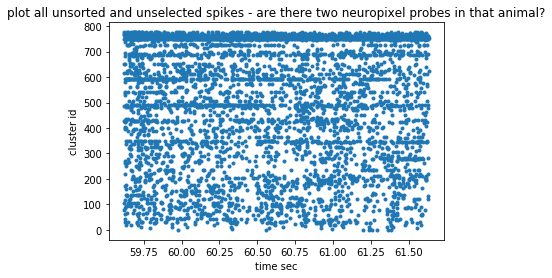

In [47]:
## spikes and cluster idx from the 'spikes' object
spiketimes = np.load(all_data_path +'/'+selected_recordings+'/'+'spikes.times.npy')
spikeclusters = np.load(all_data_path +'/'+selected_recordings+'/'+'spikes.clusters.npy')
## to check if it corresponds to clusters class
## the numbers in there match raws of the cluster objects (see below)
uniquespikeclusters = np.unique(spikeclusters)
print('number of clusters in spikeclusters = ')
print(len(uniquespikeclusters))

# ploting the 5000 nth spikes, picked from all the clusters
firstspiketoplot = 100000
numberofspikestoplot = 5000
idtoplot = np.arange(firstspiketoplot, firstspiketoplot+numberofspikestoplot)
plt.plot(spiketimes[idtoplot], spikeclusters[idtoplot], '.')
plt.xlabel('time sec')
plt.ylabel('cluster id')
plt.title('plot all unsorted and unselected spikes - are there two neuropixel probes in that animal?')

Text(0.5, 1.0, 'rasters of selected cells')

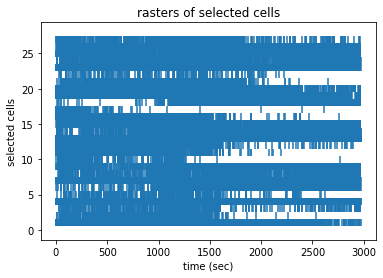

In [61]:
## iteratively selecting spikes from distinct cluster and generating an array of N arrays for N cells
for thatspike in np.arange(len(clean_Clusters_InTheRightArea)):
    #print(clean_Clusters_InTheRightArea[thatspike])
    #length(clean_Clusters_InTheRightArea[thatspike])
    those_spike_indices = (spikeclusters == clean_Clusters_InTheRightArea[thatspike])
    #print(spiketimes[those_spike_indices])
    plt.eventplot(spiketimes[those_spike_indices], lineoffsets=thatspike+1)
    
    #SpikeArray[thatspike,] = np.array(spiketimes[those_spike_indices])
   
    
plt.ylabel('selected cells')
plt.xlabel('time (sec)')
plt.title('rasters of selected cells')
